In [94]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import sys
sys.path.append('..')

from helper import kmeans as km

# try to load raw image
http://scikit-image.org/

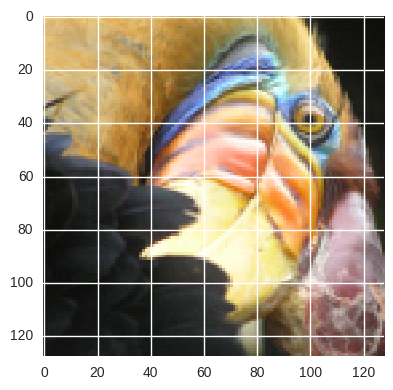

In [95]:
from skimage import io

pic = io.imread('data/bird_small.png')
io.imshow(pic)  # 128 * 128

In [96]:
pic.shape

(128, 128, 3)

In [97]:
data = pic.reshape(128*128, 3)

# let's do k-mean

`C, centroids, cost = km.k_means(data, 16)`

* my version will take more than 10 mins... ok. I know why I shouldn't implement my own ML library.

* In the future I will only implement ML algorithm for the sake of learning it XD

In [98]:
from sklearn.cluster import KMeans

In [99]:
model = KMeans(n_clusters=16, n_jobs=-1)

In [100]:
# In the new space, each dimension is the distance to the cluster centers.
model.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=16, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [101]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


/home/lucas/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [102]:
compressed_pic = centroids[C].reshape((128,128,3))

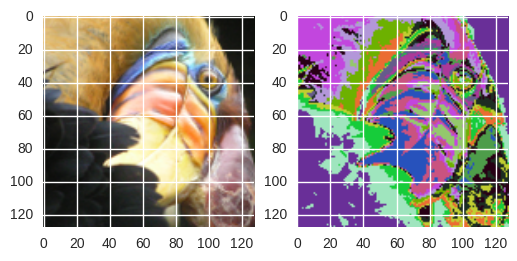

In [103]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)

What the orz?